# Sales - Analysis and Visualization

# SUPERMARKET SALES

# TABLE OF CONTENTS

1. Data Exploration
2. Data Cleaning
3. Exploratory Data Analysis

1. Finding relationships most correlated columns
2. Finding the most busy city, payment type, branch
3. Visualizing a Gender based comparison for different product type
4. Visualizing a City based comparison for different product type
5. Finding which payment method is used more often at a particular city, branch and for which product type
6. Finding which branch has a better sale for which product

# IMPORTING LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORTING DATASET

In [7]:
sales = pd.read_csv(r'D:\supermarket_sales - Sheet1.csv')

# DATA EXPLORATION AND CLEANING

In [8]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
sales.shape

(1000, 17)

In [10]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [12]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [13]:
sales['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [14]:
sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [15]:
sales.set_index('Date',inplace =True)

In [16]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [18]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [19]:
avg_unit_price = sales["Unit price"].astype("float").mean(axis=0)
sales["Unit price"].replace(np.nan, avg_unit_price, inplace=True)

In [20]:
from scipy import stats
mode=stats.mode(sales['Quantity'])

print(mode)

ModeResult(mode=array([10], dtype=int64), count=array([119]))


C:\Users\DELL\AppData\Local\Temp\ipykernel_28316\2025050483.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode=stats.mode(sales['Quantity'])


In [21]:
sales['Quantity'].replace(np.nan, "mode", inplace=True)

In [22]:
sales.dropna(inplace=True)

In [23]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [24]:
sales.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_28316\3143902651.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales.corr()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [25]:
np.round(sales.corr(),2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28316\4115018268.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(sales.corr(),2)


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


# EXPLORATORY DATA ANALYSIS

C:\Users\DELL\AppData\Local\Temp\ipykernel_28316\3845001918.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(sales.corr(),2),annot=True)


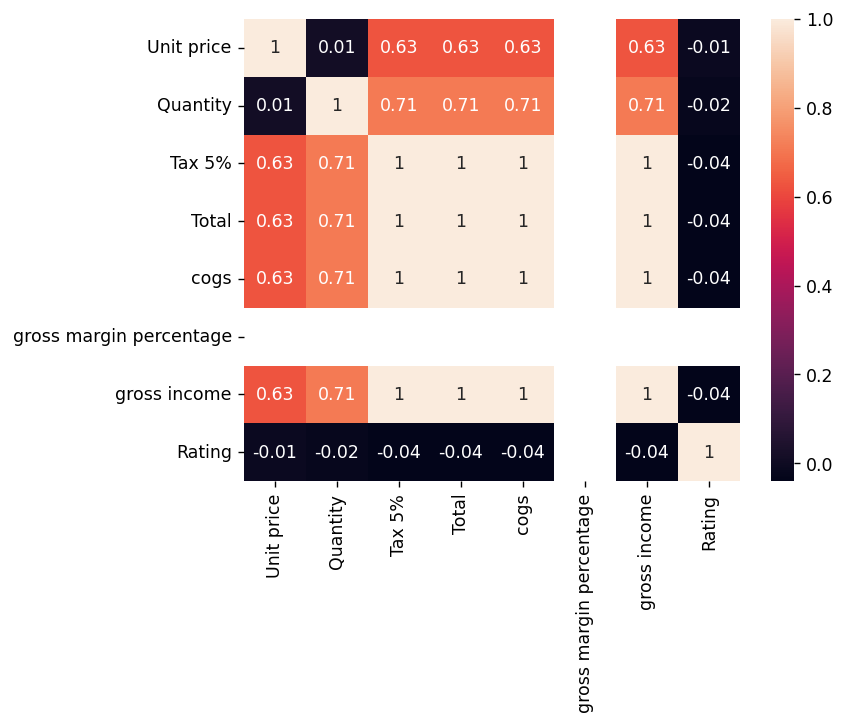

In [26]:
plt.figure(dpi=125)
sns.heatmap(np.round(sales.corr(),2),annot=True)
plt.show()

The best correlated are Tax 5%, Total, Gross Income and cogs i.e Cost of Goods sold with a correlation of 1. Also, the above mentioned all has a good correlation of 0.71 with Quantity

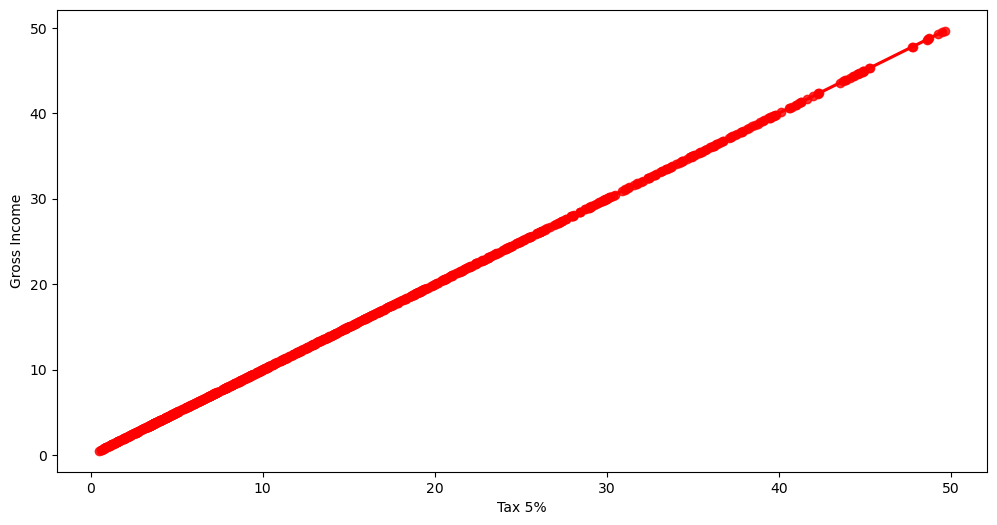

In [27]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=sales,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

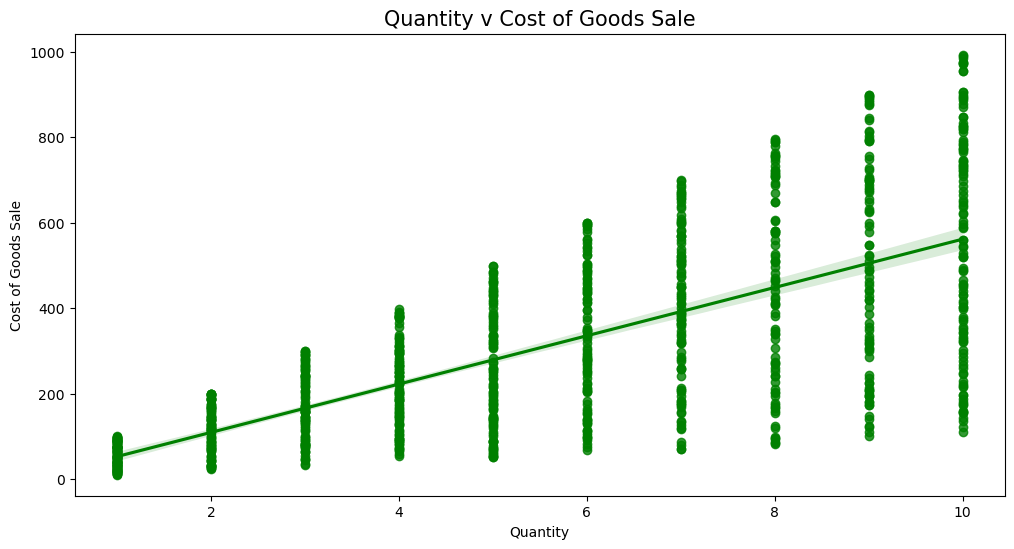

In [28]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=sales,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

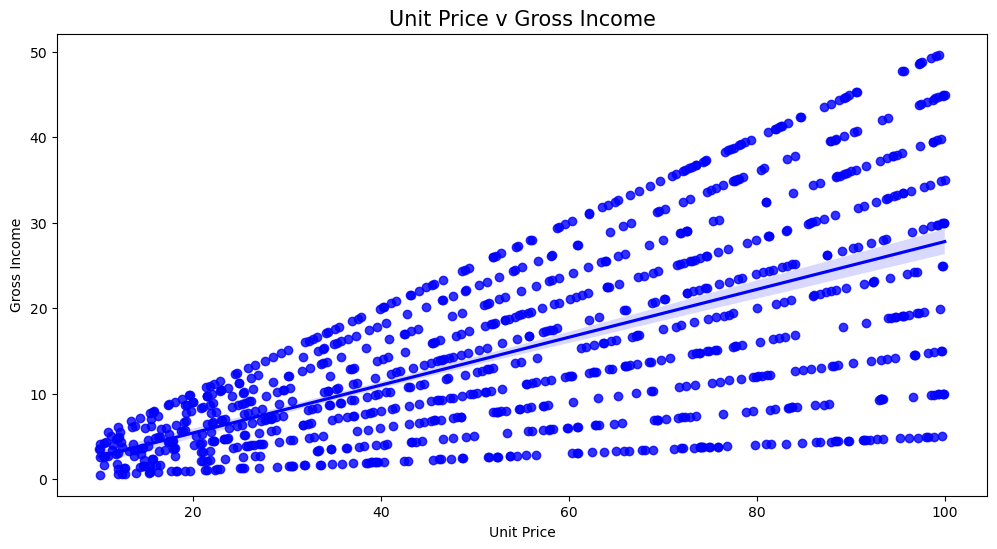

In [29]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=sales,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_28316\3214844284.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Rating'],kde=False)


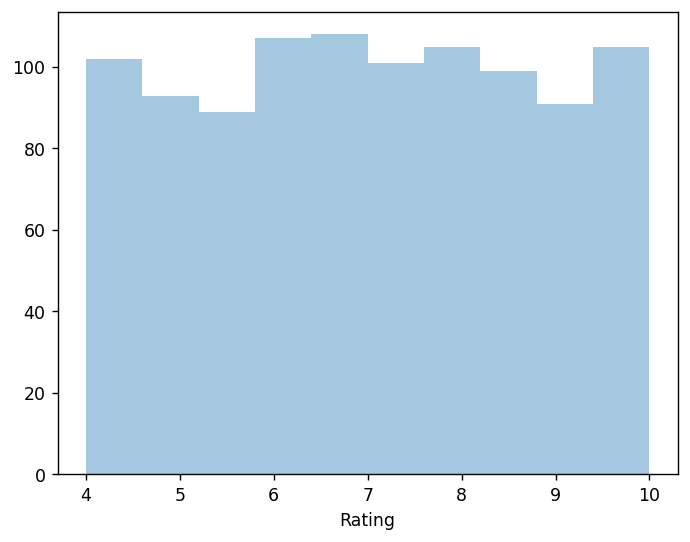

In [30]:
plt.figure(dpi=125) 
sns.distplot(sales['Rating'],kde=False)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_28316\2705171823.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Rating'],kde=False)


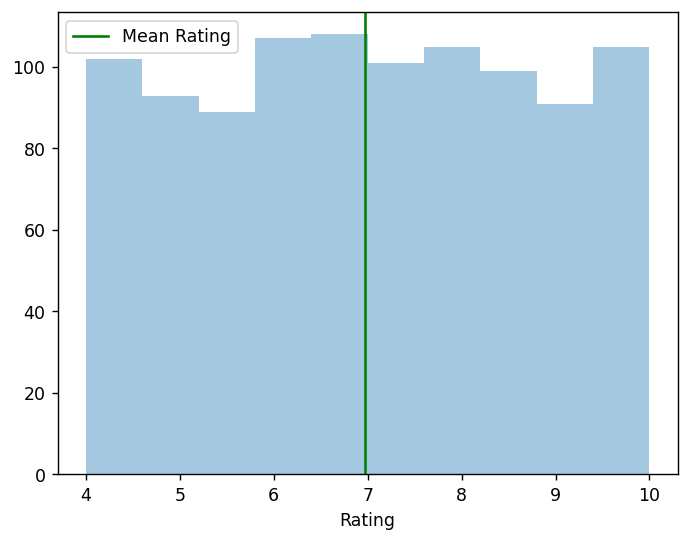

In [31]:
plt.figure(dpi=125)
sns.distplot(sales['Rating'],kde=False)
plt.axvline(x=np.mean(sales['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()

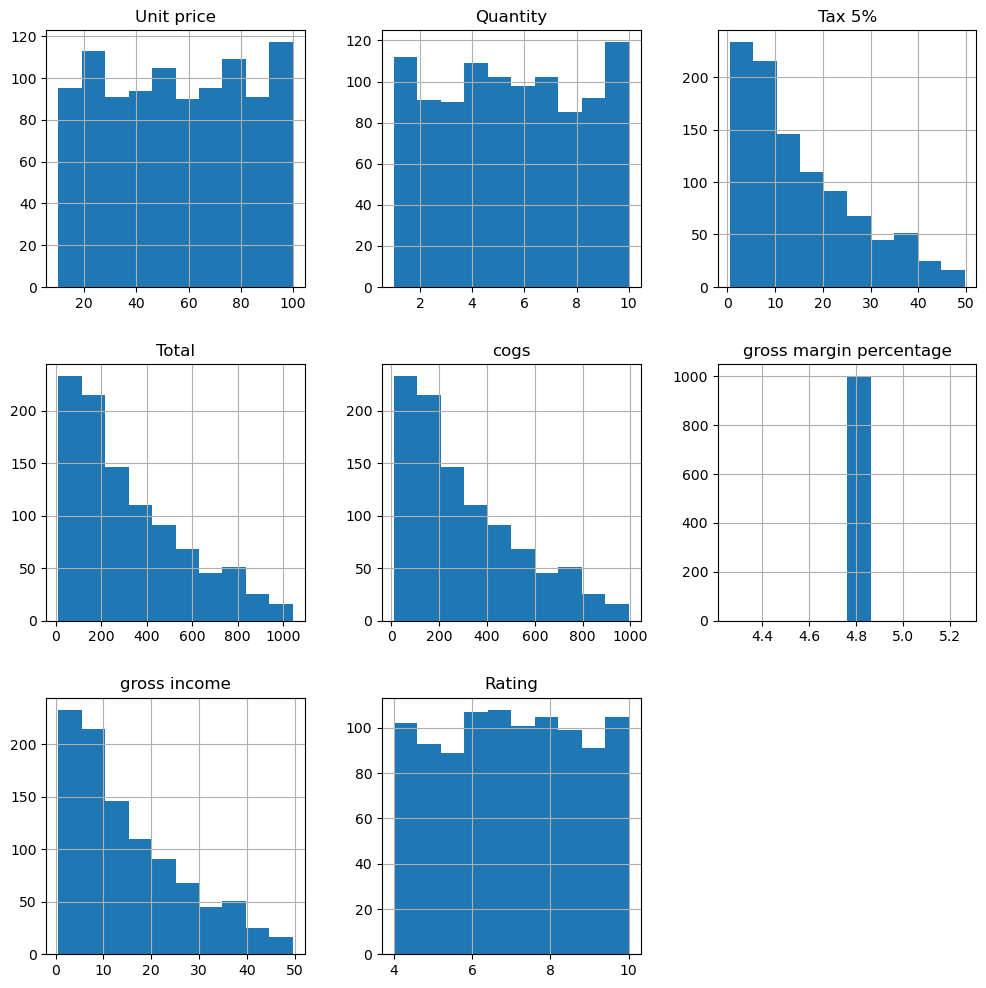

In [35]:
sales.hist(figsize=(12,12))
plt.show()

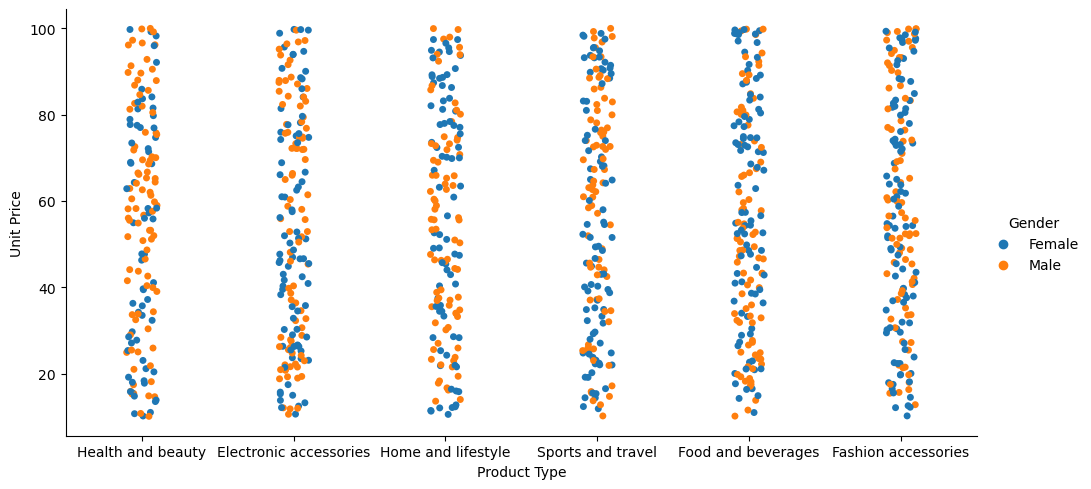

In [33]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=sales,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

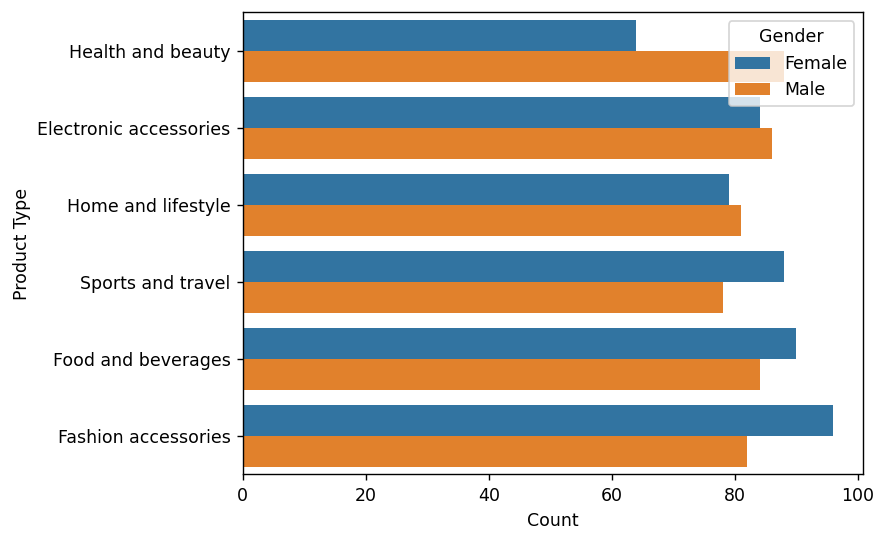

In [41]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, In Health & Beauty, Males are much more than Females whereas in Fashion accessories , Food & beverages and Sports & Travel Females are more and in the rest there is not much significant difference.

Visualizing a City based comparison related to Product Type

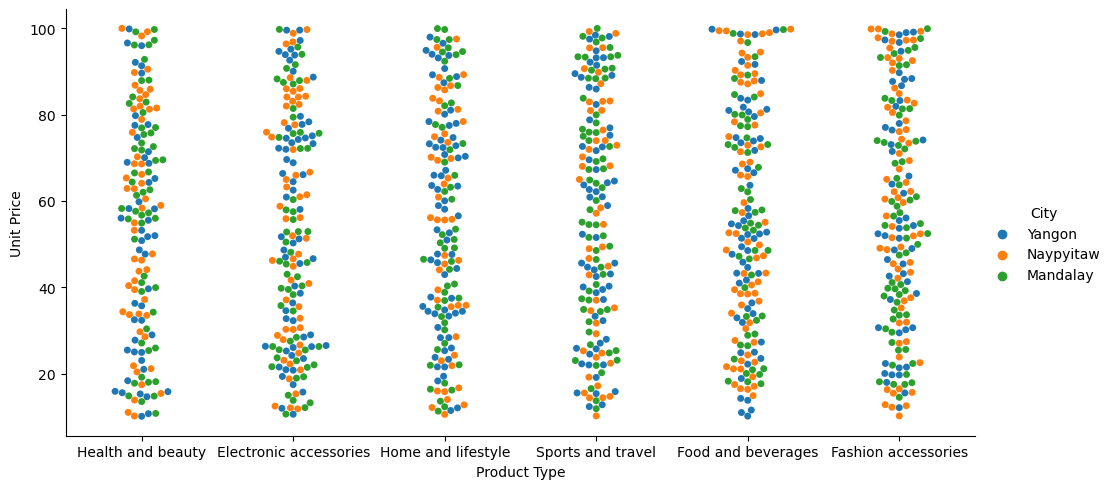

In [42]:
sns.catplot(x='Product line',y='Unit price',hue='City',kind='swarm',data=sales,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

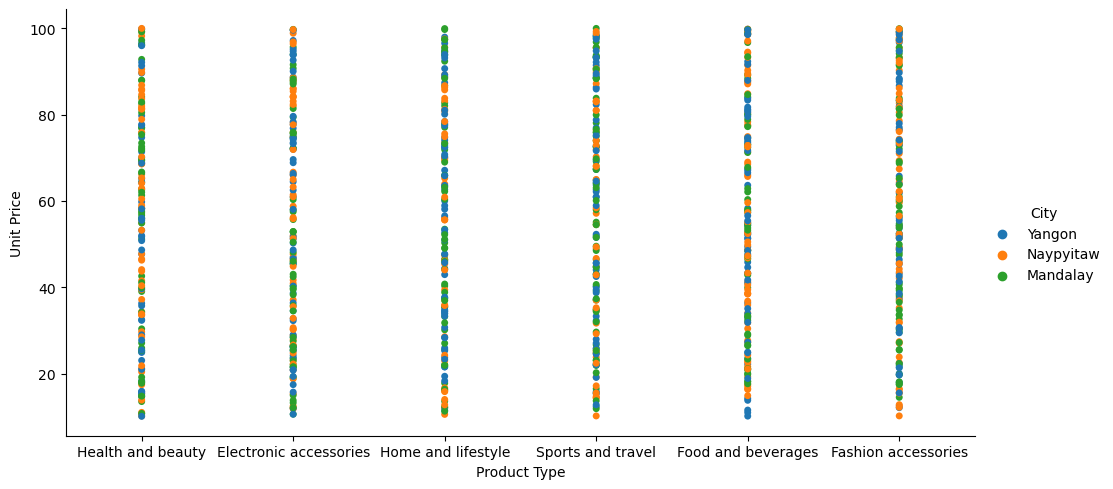

In [43]:
sns.catplot(x='Product line',y='Unit price',hue='City',data=sales,aspect=2,jitter=False)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

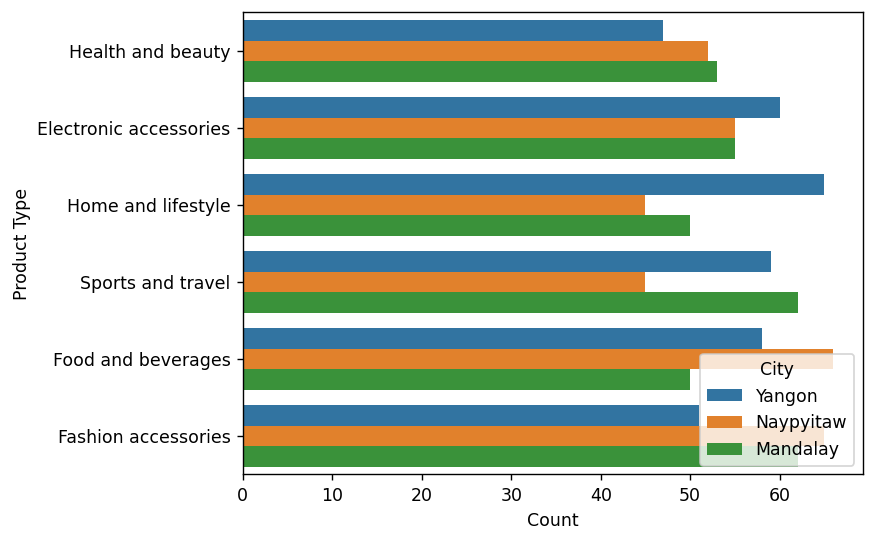

In [44]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, Yangon leads at Home & Lifestyle and Electronic accessories.

Naypyitaw leads at Food & Bevaerages and Fashion accessories.

Mandalay leads at Sports & Travel and Health & Beauty.

Finding the most used payment method for Product Type, Branch and City

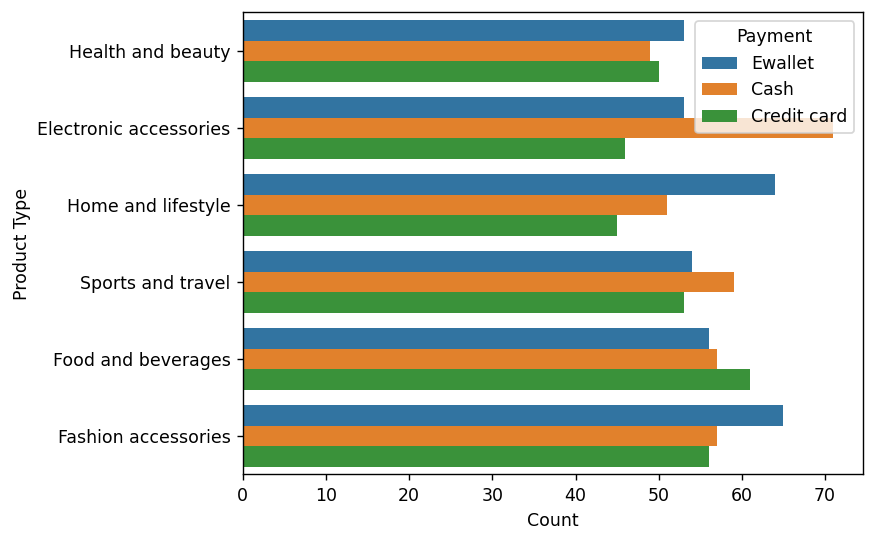

In [45]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Payment", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

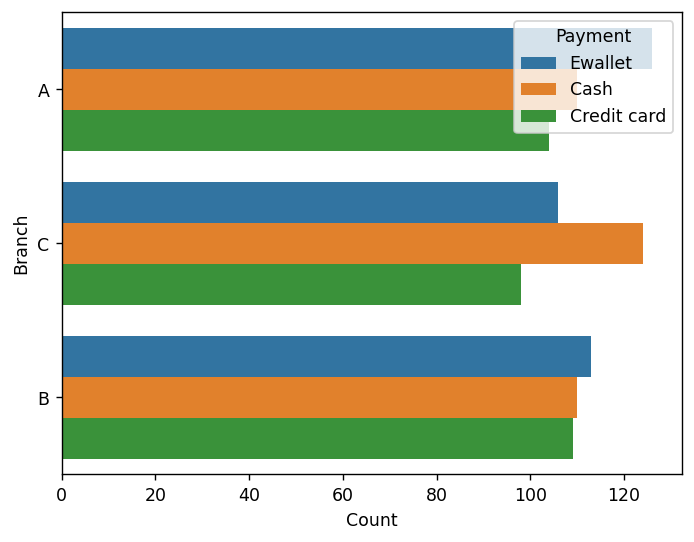

In [46]:
plt.figure(dpi=125)
sns.countplot(y ='Branch', hue = "Payment", data = sales) 
plt.xlabel('Count')
plt.ylabel('Branch')
plt.show()

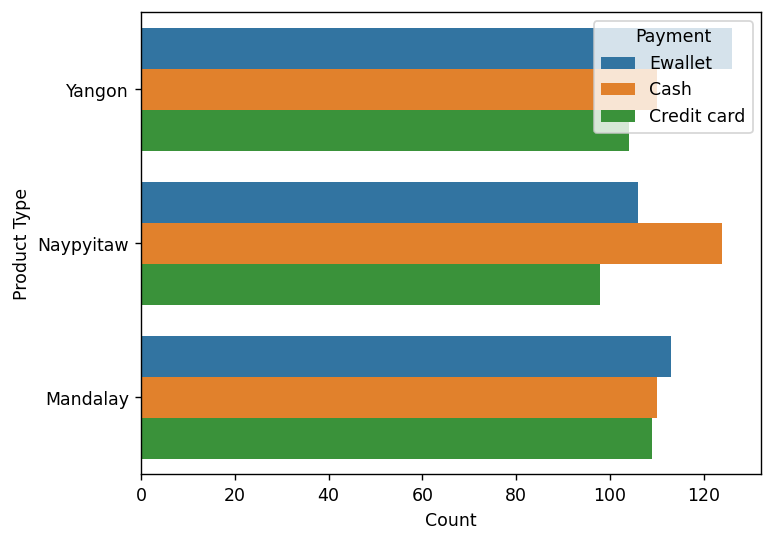

In [47]:
plt.figure(dpi=125)
sns.countplot(y ='City', hue = "Payment", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Finding Which Branch has better sale for a particular product type

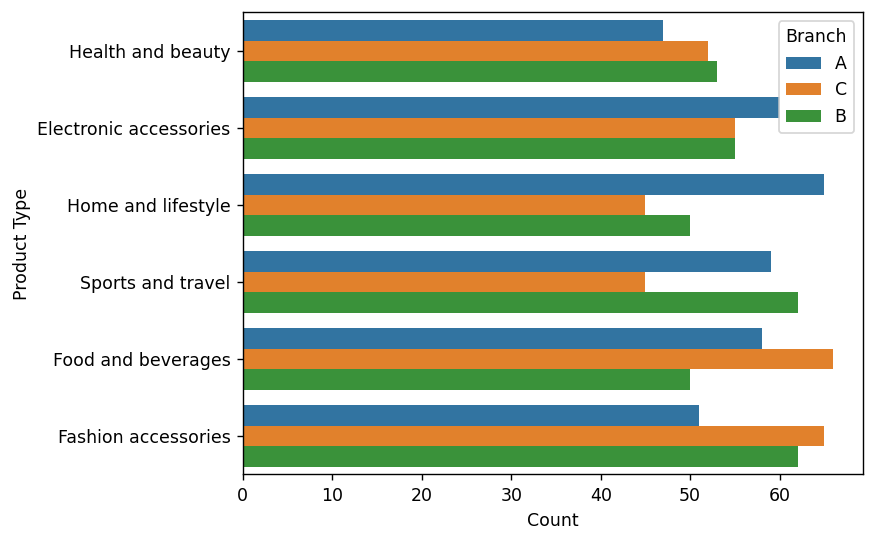

In [48]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Branch", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

# Boxen Plot for Rating and Quantity

What is Boxen Plot?

The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

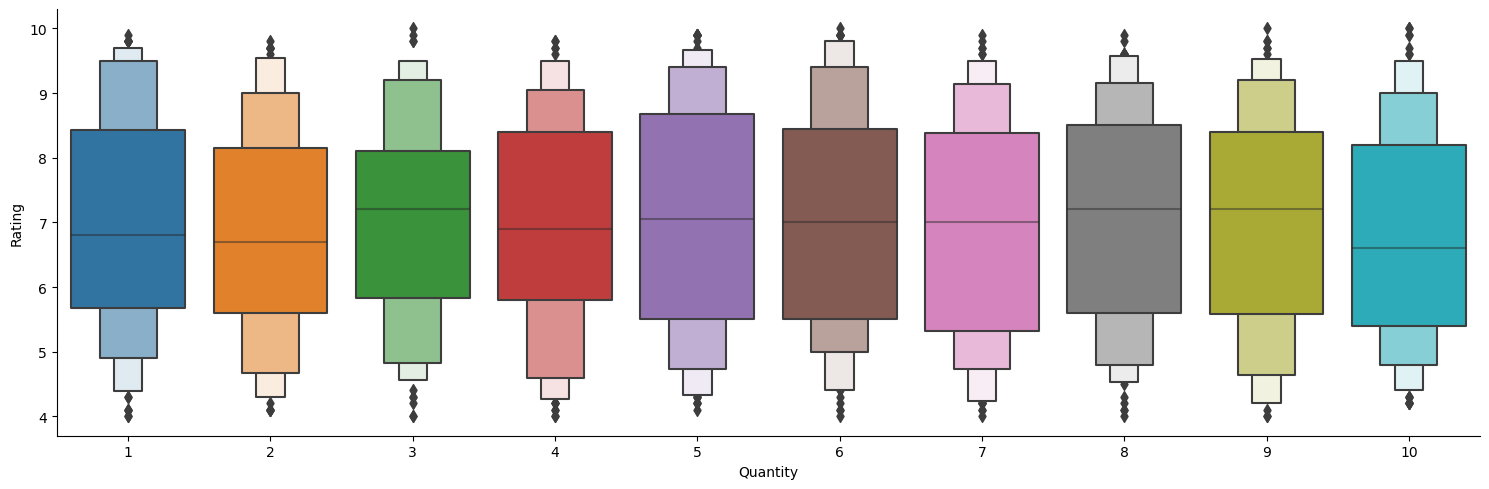

In [49]:
sns.catplot(y ='Rating',x='Quantity', data = sales,kind='boxen',aspect=3) 
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.show()

In [50]:
from wordcloud import WordCloud

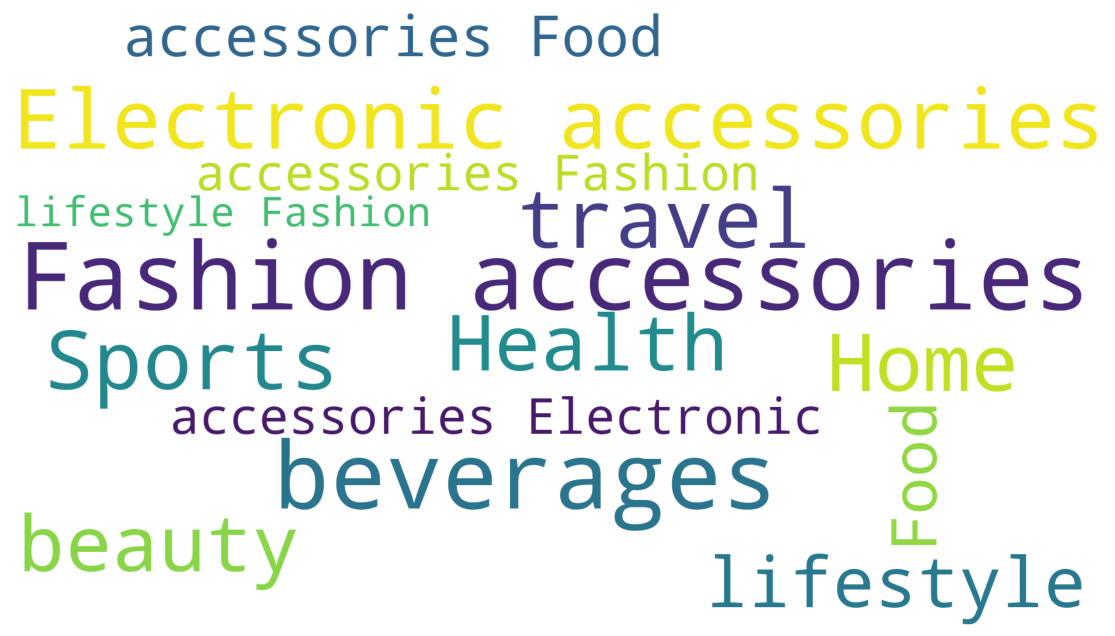

In [51]:
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(sales['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

# THANK YOU !